In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
image1 = Image.open('1.gif')
image1 = image1.resize((512, 512))
array1 = np.array(image1)

In [ ]:
river_pts=pd.read_excel('data_river.xlsx',header=None)
river_pts=np.resize(river_pts,(2,50))
river_pts=river_pts.transpose()
for i in range(50):
  river_pts[i][:2]-= 1
river_points=np.array(river_pts)

In [ ]:
nonriver_points = pd.read_excel('data_nonriver.xlsx',header=None)
nonriver_points= np.resize(nonriver_points,(2,100))
nonriver_points = nonriver_points.transpose()
for i in range(100):
  nonriver_points[i][:2]-= 1
nonriver_points = np.array(nonriver_points)
total_data=np.vstack((nonriver_points,river_points))

In [ ]:
pixel_mat = [array1[x][y] for x, y in total_data]
case_mat=[0 if i<=99 else 1 for i in range(150)]

In [ ]:
iterations=1000
lamda=0.01
learn_rate=0.001
w=0
b=0
case_mat = np.where(np.array(case_mat) <= 0, -1, 1)
for i in range(iterations):
  for ind,x in enumerate(pixel_mat):
    if case_mat[ind]*((x*w)-b)>=1:
      dw=2*lamda*w
      db=0
    else:
      dw=2*lamda*w - x*case_mat[ind]
      db=case_mat[ind]
    w=w-learn_rate*dw
    b=b-learn_rate*db
print("weight : ",w,"bias : ",b)
output=np.zeros((512,512))
for i in range(512):
  for j in range(512):
    if(array1[i][j]*w-b)>=1:
      output[i][j]=255
    elif (array1[i][j]*w-b)<=-1:
      output[i][j]=0

weight :  0.5761543263078649 bias :  5.110000000000041


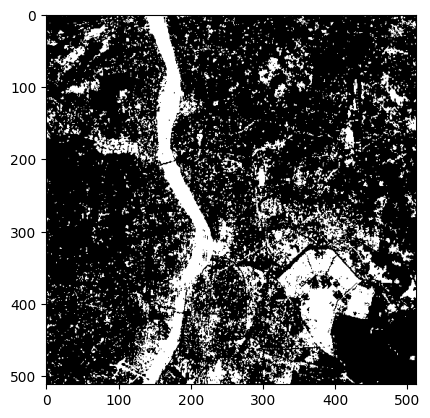

In [ ]:
plt.imshow(output,cmap='gray')